In [1]:
import pandas as pd

In [5]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [6]:
df1 = df.copy()

In [7]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [10]:
df1_norm = preprocessing.scale(df1)

In [12]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [14]:
df1_norm = pd.DataFrame(df1_norm)

In [15]:
df1_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


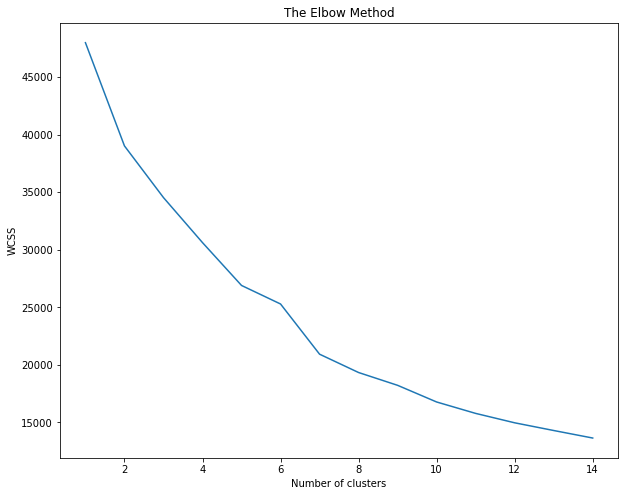

In [16]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

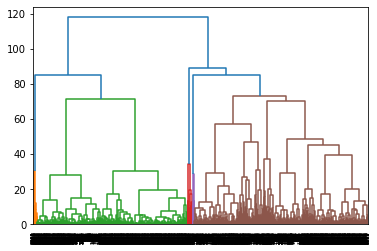

In [17]:
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='ward'))

In [18]:
X = df1_norm.values

In [19]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [20]:
h_cluster = model.fit(X)
labels = model.labels_

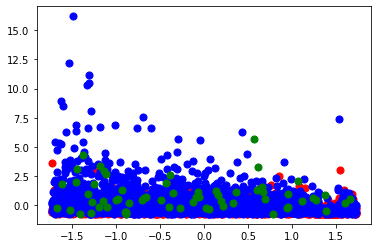

In [21]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df1_norm)

In [23]:
k_means

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [25]:
df1['k_cluster'] = k_cluster

In [26]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('k_cluster').mean(),1))
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2327.1,42243.6,91.1,1.2,1.0,1.0,4896.4,7.0,194.4,0.6,3549.8,0.2
2,1445.6,119557.7,165.6,3.6,1.0,1.0,38921.2,18.6,351.2,1.1,5147.4,0.6
3,1753.1,189304.2,788.7,2.2,1.0,1.0,31780.5,27.1,5420.4,15.8,4657.0,0.8


In [27]:
pd.DataFrame(round(df1.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525
2,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
3,164,164,164,164,164,164,164,164,164,164,164,164
